In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
boxmojo = pd.read_csv('boxmojo_db.csv')
# rating_db = pd.read_csv('title.ratings.tsv',sep = '\t')
# basics_db = pd.read_csv('title.basics.tsv',sep = '\t')

In [105]:
boxmojo[boxmojo['Market'] == 'Albania']

,Market,Release Date,Opening,Gross,title,Actor 1,Actor 2,Actor 3,Actor 4
1913,Albania,"Nov 7, 2019",–,15679.0,The Addams Family,Oscar Isaac,Charlize Theron,Chloë Grace Moretz,Finn Wolfhard
2119,Albania,"Oct 3, 2019",–,10897.0,Abominable,Chloe Bennet,Albert Tsai,Tenzing Norgay Trainor,Joseph Izzo
2834,Albania,"Dec 5, 2019","$11,567",35800.0,Last Christmas,Madison Ingoldsby,Emma Thompson,Boris Isakovic,Lucy Miller


In [142]:
gross_per_market = boxmojo.groupby('Market').sum()['Gross'].values
gross_count_markets = boxmojo.groupby('Market')['Gross'].count()
divided = gross_per_market/gross_count_markets
df = pd.DataFrame([gross_per_market, gross_count_markets, divided.values],
                  columns = ['Gross','Gross Count','Gross Average'])
df

ValueError: 3 columns passed, passed data had 119 columns

In [101]:
combined_df

,Gross,Country,No. Movies,Average Production Budget,Average Gross per Movie
0,1.372774e+10,Australia,612,29924645,2.243095e+07
1,2.307136e+09,Belgium,467,19138484,4.940334e+06
2,8.307849e+09,Brazil,333,14530526,2.494849e+07
3,3.554564e+10,China,1684,31727059,2.110786e+07
4,1.767104e+09,Denmark,217,14355063,8.143335e+06
5,1.586066e+10,France,2753,23007232,5.761229e+06
6,1.599196e+10,Germany,1207,30993014,1.324934e+07
7,2.251298e+09,Hong Kong,355,24750000,6.341684e+06
8,1.986448e+09,India,1647,14424796,1.206101e+06
9,8.555759e+09,Italy,1131,16391000,7.564774e+06


In [58]:
country_budget = pd.read_csv('country_production_budgets.csv')

In [4]:
#cleans boxmojo gross column
boxmojo['Gross'] = boxmojo['Gross'].str.replace(',', '').str.replace('$', '')
boxmojo['Gross'] = boxmojo['Gross'].apply(pd.to_numeric,errors = 'coerce')
boxmojo.dropna(inplace = True)

In [59]:
#clean Average Production Budget
country_budget['Average Production Budget'] = country_budget['Average Production Budget'].str.replace(',', '').str.replace('$', '')
country_budget['Average Production Budget'] = country_budget['Average Production Budget'].apply(pd.to_numeric,errors = 'coerce')

In [6]:
#clean Total Worldwide Box Office
country_budget['Total Worldwide Box Office'] = country_budget['Total Worldwide Box Office'].str.replace(',', '').str.replace('$', '')
country_budget['Total Worldwide Box Office'] = country_budget['Total Worldwide Box Office'].apply(pd.to_numeric,errors = 'coerce')

In [60]:
#clean no. of movies
country_budget['No. Movies'] = country_budget['No. Movies'].str.replace(',', '').str.replace('$', '')
country_budget['No. Movies'] = country_budget['No. Movies'].apply(pd.to_numeric,errors = 'coerce')

In [61]:
country_budget = country_budget.drop(['Total Worldwide Box Office'],axis = 1)

In [62]:
country_budget_df = country_budget[2:22]

In [63]:
country_budget_df['No. Movies'].iloc[0]

1684

In [11]:
gross_by_country = boxmojo.groupby('Market')['Gross'].sum()

In [12]:
gross_by_country = pd.DataFrame(gross_by_country)

In [13]:
boxmojo['Market'].unique()


array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Italy', 'Lithuania', 'Netherlands',
       'Nigeria', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'Argentina', 'Bolivia',
       'Brazil', 'Chile', 'Colombia', 'Mexico', 'Paraguay', 'Uruguay',
       'Venezuela', 'Australia', 'Hong Kong', 'India', 'Indonesia',
       'Japan', 'Malaysia', 'New Zealand', 'Philippines', 'Russia/CIS',
       'Singapore', 'South Korea', 'Taiwan', 'Thailand', 'Vietnam',
       'China', 'Russia', 'Bahrain', 'Estonia', 'Ghana', 'Israel',
       'Jordan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Oman', 'Qatar',
       'Aruba', 'Dominican Republic', 'Ecuador', 'Jamaica', 'Peru',
       'Trinidad & Tobago', 'Mongolia',

In [14]:
boxmojo['Market'].values

array(['Austria', 'Belgium', 'Bulgaria', ..., 'Italy', 'South Korea',
       'China'], dtype=object)

In [15]:
#check to make sure top countries follow same names
list_of_countries_container = []
c2 = []
for country in country_budget_df['Country'].values:
    if country in boxmojo['Market'].values:
        list_of_countries_container.append(country)
        print('yes ',country)
    else:
        c2.append(country)

yes  China
yes  France
yes  Japan
yes  Germany
yes  South Korea
yes  Australia
yes  India
yes  New Zealand
yes  Hong Kong
yes  Italy
yes  Spain
yes  Belgium
yes  Russia
yes  Mexico
yes  Netherlands
yes  Sweden
yes  Brazil
yes  Turkey
yes  Taiwan
yes  Denmark


In [16]:
#'south korea', 'russian federation to russia', 'taiwan, province to taiwan'

In [64]:
combined_df = pd.merge(gross_by_country,country_budget_df,left_on = 'Market',right_on = 'Country')
sorted_combined_df = combined_df.sort_values(by = 'Gross', ascending = False)

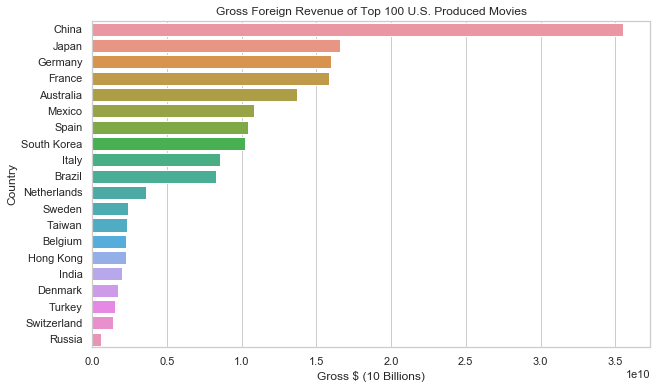

In [65]:
y = sorted_combined_df['Country'].values
x = sorted_combined_df['Gross'].values
sns.set(style="whitegrid")
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(x,y,ax=ax)
ax.set_title('Gross Foreign Revenue of Top 100 U.S. Produced Movies')
ax.set_ylabel('Country')
ax.set_xlabel('Gross $ (10 Billions)')
plt.show()

In [66]:
gross_df = pd.DataFrame(combined_df['Gross'])
num_movies_df = combined_df['No. Movies'].values

combined_df['Average Gross per Movie'] = combined_df['Gross']/combined_df['No. Movies']

In [67]:
avg_gross_per_movie = combined_df['Average Gross per Movie']
avg_prod = combined_df['Average Production Budget']
combined_df

,Gross,Country,No. Movies,Average Production Budget,Average Gross per Movie
0,1.372774e+10,Australia,612,29924645,2.243095e+07
1,2.307136e+09,Belgium,467,19138484,4.940334e+06
2,8.307849e+09,Brazil,333,14530526,2.494849e+07
3,3.554564e+10,China,1684,31727059,2.110786e+07
4,1.767104e+09,Denmark,217,14355063,8.143335e+06
5,1.586066e+10,France,2753,23007232,5.761229e+06
6,1.599196e+10,Germany,1207,30993014,1.324934e+07
7,2.251298e+09,Hong Kong,355,24750000,6.341684e+06
8,1.986448e+09,India,1647,14424796,1.206101e+06
9,8.555759e+09,Italy,1131,16391000,7.564774e+06


In [99]:
avg_gross_per_movie

0     2.243095e+07
1     4.940334e+06
2     2.494849e+07
3     2.110786e+07
4     8.143335e+06
5     5.761229e+06
6     1.324934e+07
7     6.341684e+06
8     1.206101e+06
9     7.564774e+06
10    1.433610e+07
11    2.972292e+07
12    1.007152e+07
13    8.207947e+05
14    1.163419e+07
15    1.038848e+07
16    1.143722e+07
17    8.067246e+06
18    2.152317e+07
19    1.926513e+06
Name: Average Gross per Movie, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

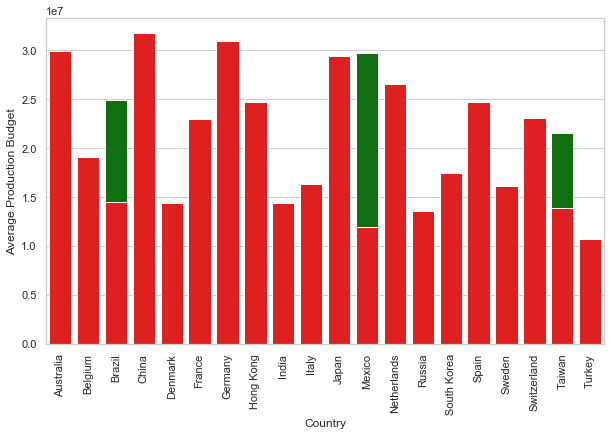

In [98]:

fig2,ax1 = plt.subplots(figsize=(10,6))
# ax1.scatter(avg_prod,avg_gross_per_movie)
sns.barplot(combined_df['Country'],avg_gross_per_movie, ax = ax1, alpha = 1 , color = 'green')
sns.barplot(combined_df['Country'],avg_prod, ax = ax1,alpha = 1, color = 'red')
plt.xticks(rotation = 90)
# plt.legend(['Average Production Cost','Average Gross per Movie'])
#dark green is avg prod cost,
#light green is 